In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobathon-analytics-vidhya/sample_submission.csv
/kaggle/input/jobathon-analytics-vidhya/train.csv
/kaggle/input/jobathon-analytics-vidhya/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/jobathon-analytics-vidhya/train.csv")
test=pd.read_csv("/kaggle/input/jobathon-analytics-vidhya/test.csv")
s=pd.read_csv("/kaggle/input/jobathon-analytics-vidhya/sample_submission.csv")

In [3]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [4]:
train[train['Response']==1]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1
10,11,C28,600,Owned,Individual,21,21,No,X2,NaN,NaN,21,4068.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50858,50859,C1,494,Rented,Joint,62,29,Yes,X1,13.0,3.0,18,24323.2,1
50863,50864,C1,3705,Owned,Individual,75,75,No,X3,NaN,NaN,16,17850.0,1
50868,50869,C1,2327,Owned,Individual,75,75,No,X3,9.0,3.0,18,22066.0,1
50875,50876,C6,231,Rented,Individual,36,36,No,X3,2.0,1.0,20,13574.0,1


In [5]:
df=train.append(test,ignore_index=True)
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN
72683,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN
72684,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0,NaN
72685,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN


In [6]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
dtype: int64

In [7]:
for k in df.columns:
    print(k,df[k].nunique())

ID 72687
City_Code 36
Region_Code 5538
Accomodation_Type 2
Reco_Insurance_Type 2
Upper_Age 58
Lower_Age 60
Is_Spouse 2
Health Indicator 9
Holding_Policy_Duration 15
Holding_Policy_Type 4
Reco_Policy_Cat 22
Reco_Policy_Premium 7685
Response 2


In [8]:
# df['upper_age_bin'] = pd.qcut(df['Upper_Age'],q=10,labels=['upp_age'+str(x) for x in range(10)])
# df['lower_age_bin'] = pd.qcut(df['Lower_Age'],q=10,labels=['low_age'+str(x) for x in range(10)])

# df['Reco_Policy_Premium_bin'] = pd.cut(df['Reco_Policy_Premium'],bins=5,labels=['premium_'+str(x) for x in range(5)])

In [9]:



# df['Health Indicator']=df.groupby('age')['Health Indicator'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )

df['Health Indicator']=df['Health Indicator'].fillna('X10')
df['age_dist']=(df['Upper_Age']-df['Lower_Age'])/df['Lower_Age']
df['age']=(df['Upper_Age']-df['Lower_Age'])

# df['Health Indicator']=df.groupby('age')['Health Indicator'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )

# df['Holding_Policy_Type']=df.groupby('age')['Holding_Policy_Type'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )

# df['Holding_Policy_Duration']=df.groupby('age')['Holding_Policy_Duration'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )


df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna('5.0')
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].fillna('5.0')
dum=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Holding_Policy_Type']


    

In [10]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
age_dist                       0
age                            0
dtype: int64

In [11]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'age_dist',
       'age'],
      dtype='object')

In [12]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,age_dist,age
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3,22,11628.0,0.0,0.000000,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,5.0,5.0,22,30510.0,0.0,2.409091,53
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,1,19,7450.0,1.0,0.000000,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3,19,17780.0,0.0,0.083333,4
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1,16,10404.0,0.0,0.000000,0


In [13]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Upper_Age':['mean','max'],
    'Lower_Age':['mean','min'],
    'Health Indicator':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    
}

df1 = df.groupby(['Reco_Policy_Cat']).agg(agg_data)

df1.columns=['A_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on='Reco_Policy_Cat',how='left')

In [14]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Upper_Age':['mean','max'],
    'Lower_Age':['mean','min'],
    'Health Indicator':['size','nunique'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    
}

df1 = df.groupby(['Region_Code','Reco_Policy_Cat']).agg(agg_data)

df1.columns=['B_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Region_Code','Reco_Policy_Cat'],how='left')

In [15]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Health Indicator':['size','nunique'],
    'Upper_Age':['mean','max'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Lower_Age':['mean','min'],
}

df1 = df.groupby(['Region_Code','Reco_Insurance_Type']).agg(agg_data)

df1.columns=['C_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Region_Code','Reco_Insurance_Type'],how='left')

In [16]:
df=pd.get_dummies(df,columns=dum,drop_first=True)
cat=['City_Code','Region_Code','Health Indicator','Holding_Policy_Duration'
     ,'Reco_Policy_Cat'
    ]
for k in cat:
    df[k]=df[k].astype('category')

In [17]:
to_drop=[]
corr_matrix = df.drop(['ID','Response'],axis=1).corr()
# print(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper   

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)


df.drop(to_drop,inplace=True,axis=1)

['age', 'A_age_dist_sum', 'A_Lower_Age_mean', 'A_Health Indicator_size', 'A_Region_Code_size', 'A_Region_Code_nunique', 'A_Holding_Policy_Duration_size', 'A_City_Code_size', 'B_Health Indicator_size', 'B_Holding_Policy_Duration_size', 'B_City_Code_size', 'C_Holding_Policy_Duration_size', 'C_City_Code_size', 'C_Region_Code_size']


In [18]:
# agg_data={
#     'Reco_Policy_Premium':['sum','max','min','mean'],
#     'age_dist':['sum','max','min','mean'],
#     'Upper_Age':['mean','max'],
#     'Lower_Age':['mean','min'],
#     'Region_Code':['size','nunique'],
    
# }

# ,

# df1 = df.groupby(['City_Code','Health Indicator', 'Holding_Policy_Duration', 'Reco_Policy_Cat']).agg(agg_data)

# df1.columns=['B_' + '_'.join(col).strip() for col in df1.columns.values]
# df1.reset_index(inplace=True)
# df1.head()

# df=df.merge(df1,on=['City_Code','Health Indicator', 'Holding_Policy_Duration', 'Reco_Policy_Cat'],how='left')

In [19]:
dftrain=df[df['Response'].isnull()!=True]
dftest=df[df['Response'].isnull()==True]
dftest.head()

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C_Region_Code_nunique,C_Lower_Age_mean,C_Lower_Age_min,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_5.0
50882,50883,C1,156,30,30,X10,6.0,5,11934.0,NaN,...,1,48.756757,22,0,0,0,0,1,0,0
50883,50884,C4,7,69,68,X1,3.0,18,32204.8,NaN,...,1,40.142857,17,0,1,1,0,1,0,0
50884,50885,C1,564,28,28,X3,2.0,17,9240.0,NaN,...,1,52.500000,19,1,0,0,0,0,1,0
50885,50886,C3,1177,23,23,X3,3.0,18,9086.0,NaN,...,1,39.533333,22,1,0,0,0,1,0,0
50886,50887,C1,951,75,75,X3,5.0,5,22534.0,NaN,...,1,47.000000,19,0,0,0,0,0,0,1


In [20]:
X,y=dftrain.drop(['ID','Response'],axis=1),dftrain['Response']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994,stratify=y)

In [21]:
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.metrics import f1_score
def evaluate_exRmse_lgb(truth, predictions):  
    ex = np.exp(-np.sqrt(mean_squared_error(truth,predictions)))
    return ('EXRMSE', ex, True) 



m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4
                )
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)],eval_metric='AUC', early_stopping_rounds=200,verbose=200)
p=m.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.874553	training's binary_logloss: 0.373863	valid_1's auc: 0.792824	valid_1's binary_logloss: 0.448889
Early stopping, best iteration is:
[71]	training's auc: 0.839978	training's binary_logloss: 0.41252	valid_1's auc: 0.794672	valid_1's binary_logloss: 0.445361
0.7946717204474664


In [22]:
# import catboost

# class ModelOptimizer:
#     best_score = None
#     opt = None
    
#     def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=1994, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
#         self.model = model
#         self.X_train = X_train
#         self.y_train = y_train
#         self.categorical_columns_indices = categorical_columns_indices
#         self.n_fold = n_fold
#         self.seed = seed
#         self.early_stopping_rounds = early_stopping_rounds
#         self.is_stratified = is_stratified
#         self.is_shuffle = is_shuffle
        
        
#     def update_model(self, **kwargs):
#         for k, v in kwargs.items():
#             setattr(self.model, k, v)
            
#     def evaluate_model(self):
#         pass
    
#     def optimize(self, param_space, max_evals=10, n_random_starts=2):
#         start_time = time.time()
        
#         @use_named_args(param_space)
#         def _minimize(**params):
#             self.model.set_params(**params)
#             return self.evaluate_model()
        
#         opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
#         best_values = opt.x
#         optimal_values = dict(zip([param.name for param in param_space], best_values))
#         best_score = opt.fun
#         self.best_score = best_score
#         self.opt = opt
        
#         print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
#         print('updating model with optimal values')
#         self.update_model(**optimal_values)
#         plot_convergence(opt)
#         return optimal_values
    
# class CatboostOptimizer(ModelOptimizer):
#     def evaluate_model(self):
#         validation_scores = catboost.cv(
#         catboost.Pool(self.X_train, 
#                       self.y_train, 
#                       cat_features=self.categorical_columns_indices),
#         self.model.get_params(), 
#         nfold=self.n_fold,
#         stratified=self.is_stratified,
#         seed=self.seed,
#         early_stopping_rounds=self.early_stopping_rounds,
#         shuffle=self.is_shuffle,
#         verbose=100,
#         plot=False)
#         self.scores = validation_scores
#         test_scores = validation_scores.iloc[:, 2]
#         best_metric = test_scores.max()
#         return 1 - best_metric
    
    
# from skopt import gp_minimize
# from skopt.space import Real, Integer
# from skopt.utils import use_named_args
# from skopt.plots import plot_convergence
# import time


# cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
#                          loss_function='Logloss',
#                          eval_metric='AUC',
#                          boosting_type='Ordered', # use permutations
#                          random_seed=1994, 
#                          use_best_model=True,random_strength=200,bagging_temperature=0.5,l2_leaf_reg=4)
# cb_optimizer = CatboostOptimizer(cb, X_train, y_train,categorical_columns_indices=categorical_features_indices)
# params_space = [Real(0.01, 0.8, name='learning_rate'),]
# cb_optimal_values = cb_optimizer.optimize(params_space)
# 45034503462176484

In [23]:
train['Response'].value_counts()/train.shape[0]

0    0.760053
1    0.239947
Name: Response, dtype: float64

In [24]:
from catboost import CatBoostRegressor,CatBoostClassifier
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices
m2=CatBoostClassifier(n_estimators=3000,random_state=1994,
                         eval_metric='AUC',learning_rate=0.05,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,
#                       class_weights={0:0.239947,1:0.760053},
#                       min_data_in_leaf=5,
#                       auto_class_weights='Balanced',
                      task_type='GPU')
m2.fit(X_train,y_train,eval_set=[(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
p=m2.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))



0:	learn: 0.5875072	test: 0.5899404	best: 0.5899404 (0)	total: 75.6ms	remaining: 3m 46s
200:	learn: 0.8007561	test: 0.7862517	best: 0.7862517 (200)	total: 13.7s	remaining: 3m 10s
400:	learn: 0.8128156	test: 0.7936597	best: 0.7936611 (399)	total: 26.2s	remaining: 2m 49s
600:	learn: 0.8172037	test: 0.7942969	best: 0.7943105 (590)	total: 38.1s	remaining: 2m 32s
bestTest = 0.7943392098
bestIteration = 605
Shrink model to first 606 iterations.
0.7943391189391126


In [25]:
from catboost import CatBoostRegressor,CatBoostClassifier
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices
m3=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4)
m3.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
p3=m3.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p3))

0:	test: 0.5181322	test1: 0.5104120	best: 0.5104120 (0)	total: 70.5ms	remaining: 3m 31s
200:	test: 0.7847243	test1: 0.7713859	best: 0.7713859 (200)	total: 18.4s	remaining: 4m 15s
400:	test: 0.8829129	test1: 0.7941059	best: 0.7941059 (400)	total: 39.5s	remaining: 4m 16s
600:	test: 0.8959742	test1: 0.7973122	best: 0.7973814 (595)	total: 1m 2s	remaining: 4m 9s
800:	test: 0.9024431	test1: 0.7978328	best: 0.7979218 (762)	total: 1m 24s	remaining: 3m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7979217607
bestIteration = 762

Shrink model to first 763 iterations.
0.7979217607391824


In [26]:
# print(roc_auc_score(y_val,(p3+p)/2))

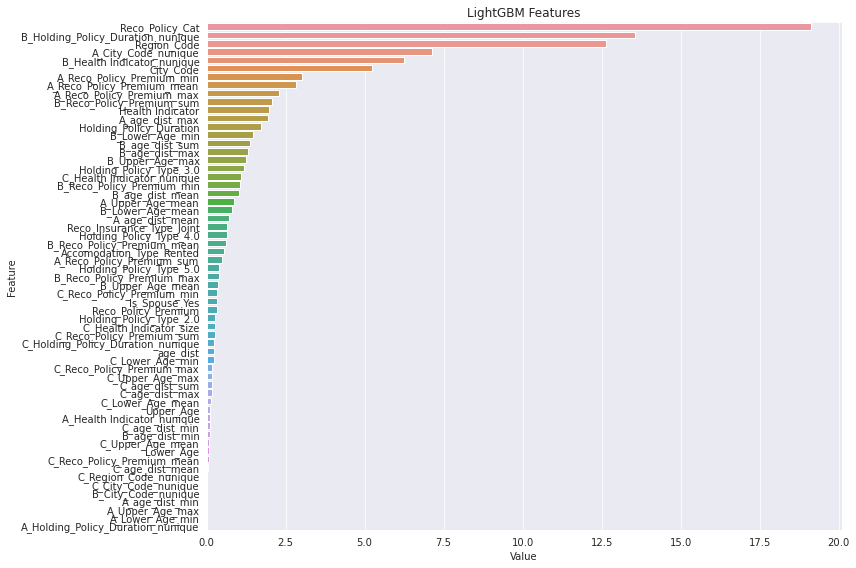

In [27]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(m2.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [28]:
feat_cols = feature_imp['Feature'][:55].values
feat_cols


array(['Reco_Policy_Cat', 'B_Holding_Policy_Duration_nunique',
       'Region_Code', 'A_City_Code_nunique', 'B_Health Indicator_nunique',
       'City_Code', 'A_Reco_Policy_Premium_min',
       'A_Reco_Policy_Premium_mean', 'A_Reco_Policy_Premium_max',
       'B_Reco_Policy_Premium_sum', 'Health Indicator', 'A_age_dist_max',
       'Holding_Policy_Duration', 'B_Lower_Age_min', 'B_age_dist_sum',
       'B_age_dist_max', 'B_Upper_Age_max', 'Holding_Policy_Type_3.0',
       'C_Health Indicator_nunique', 'B_Reco_Policy_Premium_min',
       'B_age_dist_mean', 'A_Upper_Age_mean', 'B_Lower_Age_mean',
       'A_age_dist_mean', 'Reco_Insurance_Type_Joint',
       'Holding_Policy_Type_4.0', 'B_Reco_Policy_Premium_mean',
       'Accomodation_Type_Rented', 'A_Reco_Policy_Premium_sum',
       'Holding_Policy_Type_5.0', 'B_Reco_Policy_Premium_max',
       'B_Upper_Age_mean', 'C_Reco_Policy_Premium_min', 'Is_Spouse_Yes',
       'Reco_Policy_Premium', 'Holding_Policy_Type_2.0',
       'C_Health Indica

In [29]:
Xtest=dftest.drop(['ID','Response'],axis=1)
Xtest[feat_cols]

,Reco_Policy_Cat,B_Holding_Policy_Duration_nunique,Region_Code,A_City_Code_nunique,B_Health Indicator_nunique,City_Code,A_Reco_Policy_Premium_min,A_Reco_Policy_Premium_mean,A_Reco_Policy_Premium_max,B_Reco_Policy_Premium_sum,...,C_Lower_Age_mean,Upper_Age,A_Health Indicator_nunique,C_age_dist_min,B_age_dist_min,C_Upper_Age_mean,Lower_Age,C_Reco_Policy_Premium_mean,C_age_dist_mean,C_Region_Code_nunique
50882,5,8,156,29,8,C1,2652.0,16082.540812,39456.0,459151.0,...,48.756757,30,9,0.000000,0.0,48.756757,30,13596.702703,0.00000,1
50883,18,9,7,36,7,C4,2596.0,14662.230748,43350.4,697025.0,...,40.142857,69,10,0.014706,0.0,48.285714,68,19974.285714,0.27053,1
50884,17,1,564,35,2,C1,2708.0,14891.907034,40979.2,28348.0,...,52.500000,28,10,0.000000,0.0,52.500000,28,14507.583333,0.00000,1
50885,18,8,1177,36,7,C3,2596.0,14662.230748,43350.4,210721.6,...,39.533333,23,10,0.000000,0.0,39.533333,23,10776.000000,0.00000,1
50886,5,9,951,29,5,C1,2652.0,16082.540812,39456.0,289398.4,...,47.000000,75,9,0.000000,0.0,47.000000,75,13615.047619,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,18,5,1044,36,6,C3,2596.0,14662.230748,43350.4,211024.0,...,39.714286,45,10,0.000000,0.0,39.714286,45,12575.142857,0.00000,1
72683,18,11,266,36,6,C4,2596.0,14662.230748,43350.4,386219.8,...,45.205882,59,10,0.000000,0.0,45.205882,59,12195.647059,0.00000,1
72684,1,3,2470,32,4,C12,2280.0,12876.317189,36812.8,87476.0,...,44.846154,74,10,0.000000,0.0,44.846154,74,12833.384615,0.00000,1
72685,19,2,1676,33,2,C10,2624.0,14714.576838,43046.4,19776.0,...,39.411765,25,10,0.000000,0.0,39.411765,25,11949.529412,0.00000,1


In [30]:
categorical_features_indices = np.where(X[feat_cols].dtypes =='category')[0]
categorical_features_indices

array([ 0,  2,  5, 10, 12])

In [31]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols],y):
    X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=3000,random_state=1994,
                         eval_metric='AUC',learning_rate=0.05,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,
#                       class_weights={0:0.239947,1:0.760053},
#                       min_data_in_leaf=5,
#                       auto_class_weights='Balanced',
                      task_type='GPU')
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[feat_cols],ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot.append(p)

0:	learn: 0.6960302	test: 0.7167253	best: 0.7167253 (0)	total: 69.1ms	remaining: 3m 27s
200:	learn: 0.8001203	test: 0.7943197	best: 0.7943197 (200)	total: 12.6s	remaining: 2m 55s
400:	learn: 0.8094404	test: 0.8005966	best: 0.8005966 (400)	total: 25.6s	remaining: 2m 46s
600:	learn: 0.8124977	test: 0.8017927	best: 0.8018090 (592)	total: 37.3s	remaining: 2m 29s
800:	learn: 0.8150153	test: 0.8023464	best: 0.8024154 (747)	total: 48s	remaining: 2m 11s
bestTest = 0.8026557565
bestIteration = 871
Shrink model to first 872 iterations.
err:  0.8026345655611427
0:	learn: 0.6982573	test: 0.7149409	best: 0.7149409 (0)	total: 66.1ms	remaining: 3m 18s
200:	learn: 0.8000228	test: 0.8012508	best: 0.8012508 (200)	total: 13.1s	remaining: 3m 2s
400:	learn: 0.8102371	test: 0.8065216	best: 0.8065354 (397)	total: 25.5s	remaining: 2m 45s
600:	learn: 0.8128515	test: 0.8075434	best: 0.8075699 (593)	total: 37s	remaining: 2m 27s
800:	learn: 0.8145960	test: 0.8081680	best: 0.8081680 (800)	total: 47s	remaining: 2m 

In [32]:
err2=[]
y_pred_tot2=[]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols],y):
    X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4)
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err2.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[feat_cols],ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot2.append(p)

0:	test: 0.6176086	best: 0.6176086 (0)	total: 83.3ms	remaining: 4m 9s
200:	test: 0.7813427	best: 0.7813427 (200)	total: 19s	remaining: 4m 23s
400:	test: 0.8014880	best: 0.8014880 (400)	total: 39.8s	remaining: 4m 17s
600:	test: 0.8053349	best: 0.8053552 (582)	total: 1m 1s	remaining: 4m 5s
800:	test: 0.8061530	best: 0.8062904 (708)	total: 1m 23s	remaining: 3m 48s
1000:	test: 0.8071024	best: 0.8071825 (977)	total: 1m 45s	remaining: 3m 30s
1200:	test: 0.8073597	best: 0.8075539 (1128)	total: 2m 6s	remaining: 3m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8075538639
bestIteration = 1128

Shrink model to first 1129 iterations.
err:  0.8075087638169334
0:	test: 0.6178170	best: 0.6178170 (0)	total: 84ms	remaining: 4m 12s
200:	test: 0.7860740	best: 0.7860740 (200)	total: 17.9s	remaining: 4m 9s
400:	test: 0.8085390	best: 0.8085390 (400)	total: 38s	remaining: 4m 6s
600:	test: 0.8117385	best: 0.8118639 (594)	total: 58.8s	remaining: 3m 54s
Stopped by overfitting detector 

In [33]:
err1=[]
y_pred_tot1=[]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols],y):
    X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='AUC', early_stopping_rounds=50,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err1.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[feat_cols],num_iteration=m.best_iteration_)[:,-1]
    y_pred_tot1.append(p)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	training's auc: 0.832743	training's binary_logloss: 0.419585	valid_1's auc: 0.79549	valid_1's binary_logloss: 0.445093
err:  0.7954902232306575
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	training's auc: 0.852318	training's binary_logloss: 0.397457	valid_1's auc: 0.805212	valid_1's binary_logloss: 0.437454
err:  0.8052122584180496
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	training's auc: 0.832156	training's binary_logloss: 0.419953	valid_1's auc: 0.79798	valid_1's binary_logloss: 0.443515
err:  0.7979801693593505
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	training's auc: 0.841262	training's binary_logloss: 0.410414	valid_1's auc: 0.790616	valid_1's binary_logloss: 0.447143
err:  0.7906158856507963
Training until va

In [34]:
# np.mean(y_pred_tot1,0)


In [35]:
np.mean(err),np.mean(err1),np.mean(err2)

(0.8054227387442625, 0.7981491957246378, 0.8072177862149239)

In [36]:
# dftest['Response']=np.mean(y_pred_tot1,0)

# dftest[['ID','Response']].to_csv('AV-job-lgb-sub3.csv',index=False)

In [37]:
dftest['Response']=np.mean(y_pred_tot2,0)

dftest[['ID','Response']].to_csv('AV-job-cb-sub8.csv',index=False)

In [38]:
dftest['Response']=np.mean(y_pred_tot1,0)

dftest[['ID','Response']].to_csv('AV-job-lgb-sub8.csv',index=False)

In [39]:
dftest['Response']=np.mean(y_pred_tot,0)*0.25+np.mean(y_pred_tot1,0)*0.05+np.mean(y_pred_tot2,0)*0.7

dftest[['ID','Response']].to_csv('AV-job-stack-sub8.csv',index=False)